In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
all_data = {ticker:web.get_data_yahoo(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
all_data

{'AAPL':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2017-08-01   37.555000   37.102501   37.275002   37.512501  141474400.0   
 2017-08-02   39.937500   39.040001   39.820000   39.285000  279747200.0   
 2017-08-03   39.302502   38.755001   39.262501   38.892502  108389200.0   
 2017-08-04   39.349998   38.922501   39.017502   39.097500   82239600.0   
 2017-08-07   39.730000   39.167500   39.264999   39.702499   87481200.0   
 ...                ...         ...         ...         ...          ...   
 2022-07-25  155.039993  152.279999  154.009995  152.949997   53623900.0   
 2022-07-26  153.089996  150.800003  152.259995  151.600006   55138700.0   
 2022-07-27  157.330002  152.160004  152.580002  156.789993   78620700.0   
 2022-07-28  157.639999  154.410004  156.979996  157.350006   81378700.0   
 2022-07-29  163.630005  159.500000  161.240005  162.509995  101689200.0   
 
  

In [2]:
price = pd.DataFrame({ticker:data['Adj Close'] for ticker, data in all_data.items()})

In [3]:
volume = pd.DataFrame({ticker:data['Volume'] for ticker, data in all_data.items()})

In [4]:
returns = price.pct_change()
returns

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-08-01,NaN,NaN,NaN,NaN
2017-08-02,0.047251,-0.005850,-0.004409,-0.000473
2017-08-03,-0.009991,0.003392,-0.001522,-0.007244
2017-08-04,0.005271,0.001518,0.007346,0.004666
2017-08-07,0.015474,-0.011642,-0.003852,0.001509
...,...,...,...,...
2022-07-25,-0.007398,0.002261,-0.005876,-0.001384
2022-07-26,-0.008826,-0.003579,-0.026774,-0.025598
2022-07-27,0.034235,0.008120,0.066852,0.077390


In [5]:
def a(x):
    positive = 0
    negative = 0
    for item in x:
        if item > 0:
            positive += 1
        elif item < 0:
            negative += 1
    return pd.Series([positive/x.count(), negative/x.count()],index=["expand","fall"])
price1 = returns.apply(a)
price1

,AAPL,IBM,MSFT,GOOG
expand,0.536197,0.525855,0.553699,0.544153
fall,0.461416,0.470963,0.439936,0.455847


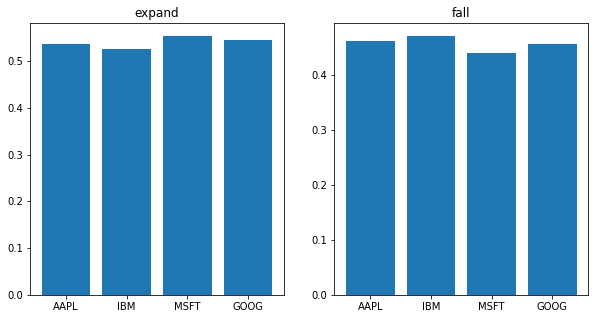

In [15]:
figure = plt.figure(figsize=(10,5))
ax1 = figure.add_subplot(1,2,1)
ax1.bar(price1.T.index,price1.T['expand'])
ax2 = figure.add_subplot(1,2,2)
ax2.bar(price1.T.index,price1.T['fall'])
ax1.set_title('expand')
ax2.set_title('fall')
plt.show()